## Deep Models (profundos) vs Wide Models (amplios)

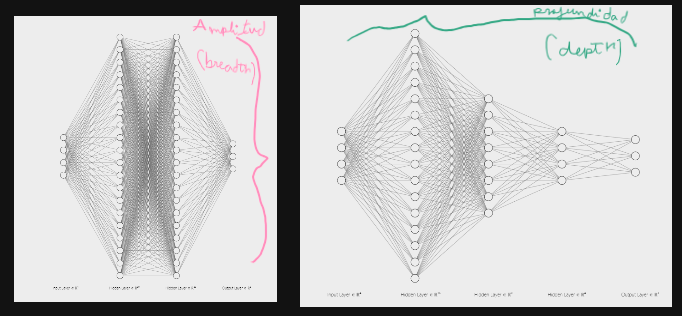

In [26]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("dark_background")

## Creamos los dos tipos de arquitectura de modelo

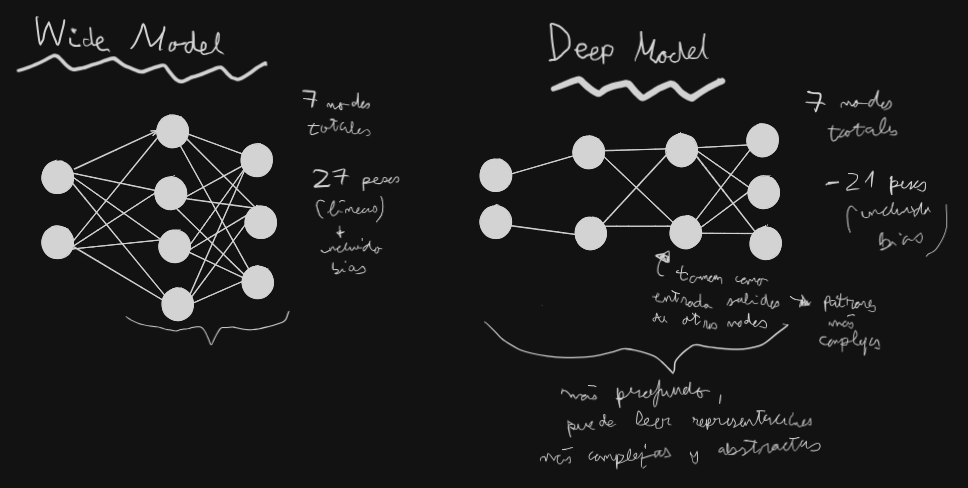

In [27]:
wide_model = nn.Sequential(
    nn.Linear(2,4), #capa oculta, toma 2 nodos entrada
    nn.Linear(4,3) #capa de salida
)

deep_model = nn.Sequential(
    nn.Linear(2,2), #hidden layer 1
    nn.Linear(2,2), #hidden layer 2
    nn.Linear(2,3) #output layer
)

In [28]:
print("Wide Model:")
print(wide_model)

Wide Model:
Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)


In [29]:
print("Deep Model:")
print(deep_model)

Deep Model:
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


## Visualizar los atributos de cada objeto de los modelos

In [30]:
for p in deep_model.named_parameters():
    print(p)
    print("")

('0.weight', Parameter containing:
tensor([[ 0.4779,  0.6202],
        [-0.5917, -0.5656]], requires_grad=True))

('0.bias', Parameter containing:
tensor([-0.5581, -0.1201], requires_grad=True))

('1.weight', Parameter containing:
tensor([[-0.0275,  0.2182],
        [-0.2820,  0.4023]], requires_grad=True))

('1.bias', Parameter containing:
tensor([0.1392, 0.3744], requires_grad=True))

('2.weight', Parameter containing:
tensor([[ 0.2409, -0.3113],
        [ 0.2075,  0.3478],
        [ 0.4751, -0.5190]], requires_grad=True))

('2.bias', Parameter containing:
tensor([ 0.0831,  0.0058, -0.0554], requires_grad=True))



## Contar el número total de nodos (a partir del número de biases)
### *(teniendo en cuenta que cada nodo tiene un bias)*

In [31]:
# count the number of nodes ( = the number of biases)

# named_parameters() is an iterable that returns the tuple (name,numbers)

#modelo amplio
num_nodes_wide_model = 0

for param in wide_model.named_parameters():
  if 'bias' in param[0]:
    num_nodes_wide_model += len(param[1]) #almacenamos la cantidad de biases que tiene el vector actual

#modelo profundo
    
num_nodes_deep_model = 0
for param_name,param_vect in deep_model.named_parameters():
  if 'bias' in param_name:
    num_nodes_deep_model += len(param_vect)


print(f'There are {num_nodes_wide_model} nodes in the wide network')
print(f'There are {num_nodes_deep_model} nodes in the deep network')

There are 7 nodes in the wide network
There are 7 nodes in the deep network


*Otra forma de visualizar los parámetros del modelo, pero sin incluir la tupla con el nombre*

In [32]:
# just the parameters
for p in wide_model.parameters():
  print(p)
  print(' ')

Parameter containing:
tensor([[ 0.1363, -0.3761],
        [-0.5757, -0.2995],
        [-0.1112,  0.5378],
        [-0.0169, -0.1396]], requires_grad=True)
 
Parameter containing:
tensor([ 0.1534,  0.5170, -0.2671,  0.5789], requires_grad=True)
 
Parameter containing:
tensor([[ 0.1529,  0.0950,  0.2157,  0.1841],
        [ 0.1106, -0.4456, -0.2467, -0.4392],
        [ 0.2495, -0.3136,  0.4777, -0.3983]], requires_grad=True)
 
Parameter containing:
tensor([ 0.4018, -0.2855, -0.0382], requires_grad=True)
 


## Contar los parámetros entrenables de cada modelo

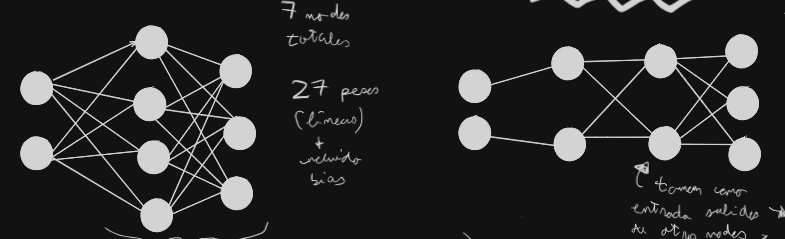

In [33]:
# now count the total number of trainable parameters
n_params = 0
for p in wide_model.parameters():
  if p.requires_grad:#si requires_grad=False, no es un parámetro entrenable, sino que es algo "fijo"
    print('This piece has %s parameters' %p.numel()) #p.numel() nos devuelve el nº total de elementos en un tensor
    n_params += p.numel()

print(f'\n\nTotal of {n_params} parameters')

This piece has 8 parameters
This piece has 4 parameters
This piece has 12 parameters
This piece has 3 parameters


Total of 27 parameters


- ### La pieza 1 nos indica los pesos, que son 8, cada "línea" que conecta la primera capa que toma las entradas del exterior, si multiplicas 4 nodos ocultos * 2 nodos entrada = 8 pesos.

- ### La pieza 2, nos da los biases de dicha capa oculta, que serían 4, (1 para cada nodo)

- ### Hacemos mismo procedimiento para los pesos que conectan la primera capa oculta con los nodos de salida, 4 nodos ocultos * 3 nodos salida = 12 pesos, y 1 bias para cada nodo de salida * 3 nodos = 3 biases. 

In [34]:
# otra forma de hacerlo, usando el empaquetado de listas

n_params_wide = np.sum([ p.numel() for p in wide_model.parameters() if p.requires_grad ])
print('Widenet has %s parameters'%n_params_wide)

n_params_deep = np.sum([ p.numel() for p in deep_model.parameters() if p.requires_grad ])
print('Deepnet has %s parameters'%n_params_deep)

Widenet has 27 parameters
Deepnet has 21 parameters


## Una forma de sumarizar la arquitectura de nuestras redes

In [35]:
from torchinfo import summary

In [48]:
summary(deep_model, input_size=(1,2), #especificamos el parámetro opcional input_size indicando el tamaño de entrada 
        device="cpu") 

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Linear: 1-1                            [1, 2]                    6
├─Linear: 1-2                            [1, 2]                    6
├─Linear: 1-3                            [1, 3]                    9
Total params: 21
Trainable params: 21
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [53]:
summary(wide_model, input_size=(1,2))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Linear: 1-1                            [1, 4]                    12
├─Linear: 1-2                            [1, 3]                    15
Total params: 27
Trainable params: 27
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00